# Final Project Wine Data

In [34]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict

import pprint

import warnings
warnings.filterwarnings('ignore')

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors

from nltk.draw.dispersion import dispersion_plot

In [2]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
!conda list | findstr gensim

gensim                    3.6.0                    pypi_0    pypi


In [4]:
df = pd.read_csv("winemag-data-130k-v2.csv", index_col="Unnamed: 0")
#del df['Unnamed: 0']
df

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O’Keefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine    
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine    
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine    
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer 

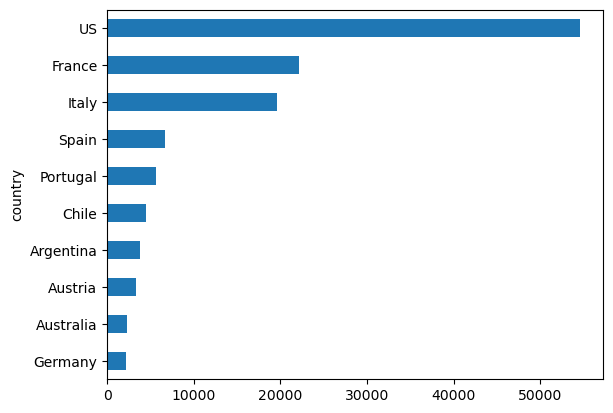

In [83]:
#Looking at number of reviews by each country to select country with most reviews for word cloud generation 
df1 = df["country"]
num_of_reviews = df1.groupby(df["country"]).count()
num = num_of_reviews.sort_values(ascending=True)

#Looking at reviews of top 10 countries 
reviews = num.tail(10)

bargraph = reviews.plot.barh(x='country', y='reviews[1]')

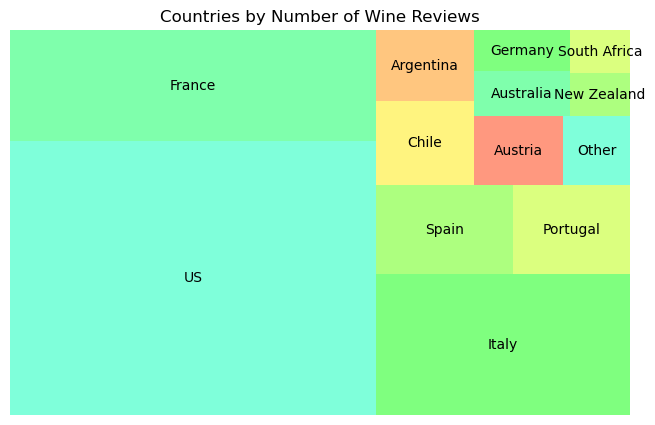

In [141]:
#This is just a reference code, can modify or remove entirely 

#!pip install squarify
import squarify as sq

countries = df.country.value_counts()

# Limit top countries to those with more than 500 reviews
temp_dict = countries[countries>1000].to_dict()
temp_dict['Other'] = countries[countries<1000].sum()
less_countries = pd.Series(temp_dict)
less_countries.sort_values(ascending=False, inplace=True)


#cmap = plt.cm.gist_rainbow_r
norm = matplotlib.colors.Normalize(vmin=0, vmax=15)
#colors = [cmap(norm(value)) for value in range(15)]
colors = [cmap(norm(value)) for value in range(7,15)]
#np.random.shuffle(colors)

# Use squarify to plot the tree map with the custom colors
fig,ax = plt.subplots(1,1,figsize=(8,5))
sq.plot(sizes=less_countries.values, label=less_countries.index.values, alpha=0.5, ax=ax, color=colors)
plt.axis('off')
plt.title('Countries by Number of Wine Reviews')
plt.show()

### Wordcloud for words used in reviews by specific country 

In [49]:
#Specifiying stopwords for the reviews

stopwords_reviews = ["wine", "review", "drink", "bottle", "flavor", "hint", "finish", "palate", "show", "now", "flavors", "shows", "fruit", "will", "give", "made"]
stopwords_updated = set(STOPWORDS)
stopwords_updated.update(stopwords_reviews)

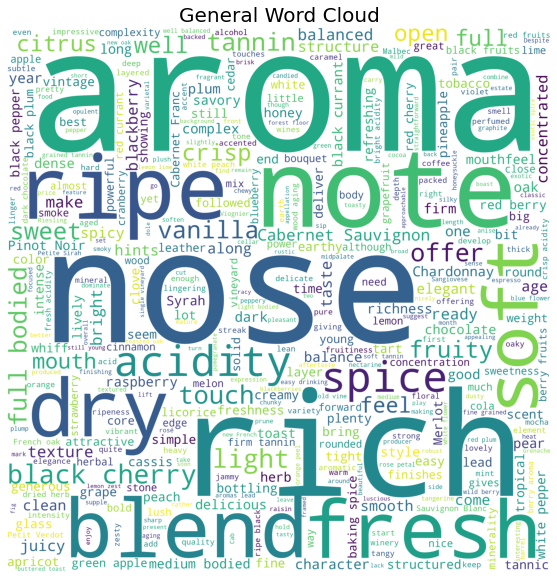

In [142]:
##Our code 

%matplotlib inline

text = df['description'].astype(str)
wordcloud = WordCloud(stopwords=stopwords_updated,
                      background_color='white',width=3000,height=3000, max_words=400).generate(" ".join(text)) 

print(wordcloud)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.title("General Word Cloud",fontsize=20)
plt.axis('off')
plt.show()

# Country Maps

In [115]:
from collections import defaultdict
descriptions = defaultdict(list)
df.apply(lambda x: descriptions[x.country].append(x.description), axis=1)
descriptions['US']#[0:5]

['Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.',
 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
 "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",
 'Soft, supple plum envelopes an oaky structure in this Cabernet, supported by 15% Merlot. Coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.',
 'Slightly reduced, this wine offers a chalky, tannic backbone to an otherwise juicy explosion of rich 

In [116]:
import re
from PIL import Image
from IPython.display import Image as im
unwanted_characters = re.compile('[^A-Za-z ]+')
for country in list(df.country.unique()):
    desc_string = ' '.join(descriptions[country])
    descriptions[country] = ' '.join([w.lower() for w in re.sub(unwanted_characters, ' ', desc_string).split() if len(w) > 3])


In [126]:
def generate_country_wordcloud(words, mask_image, filename=None, colormap='jet'):
    mask = np.array(Image.open(mask_image))
    wc = WordCloud(background_color="white", max_words=3000, mask=mask, stopwords=stopwords_updated, colormap=colormap)
    wc.generate(words)
    if filename:
        wc.to_file(filename)
    return wc
    plt.figure(figsize = (12,16))

In [132]:
masks = dict()
masks['Argentina'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\argentina_bw_map.jpg"
masks['Australia'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\australia_bw_map.jpg"
masks['Austria'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\austria_bw_map.jpg"
masks['Chile'] = r"chile_bw_map.jpg"
masks['France'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\france_bw_map.jpg"
masks['Italy'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\italy_bw_map.jpg"
masks['Portugal'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\portugal_bw_map.jpg"
masks['Spain'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\spain_bw_map.jpg"
masks['US'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\usa_bw_map.jpg"
masks['Germany'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\germany_bw_map.jpg"
masks['Israel'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\israel_bw_map.jpg"
masks['New Zealand'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\newzealand_bw_map.jpg"
masks['South Africa'] = r"C:\Users\devan\Desktop\DATA ANALYTICS\Project\southafrica_bw_map.jpg"

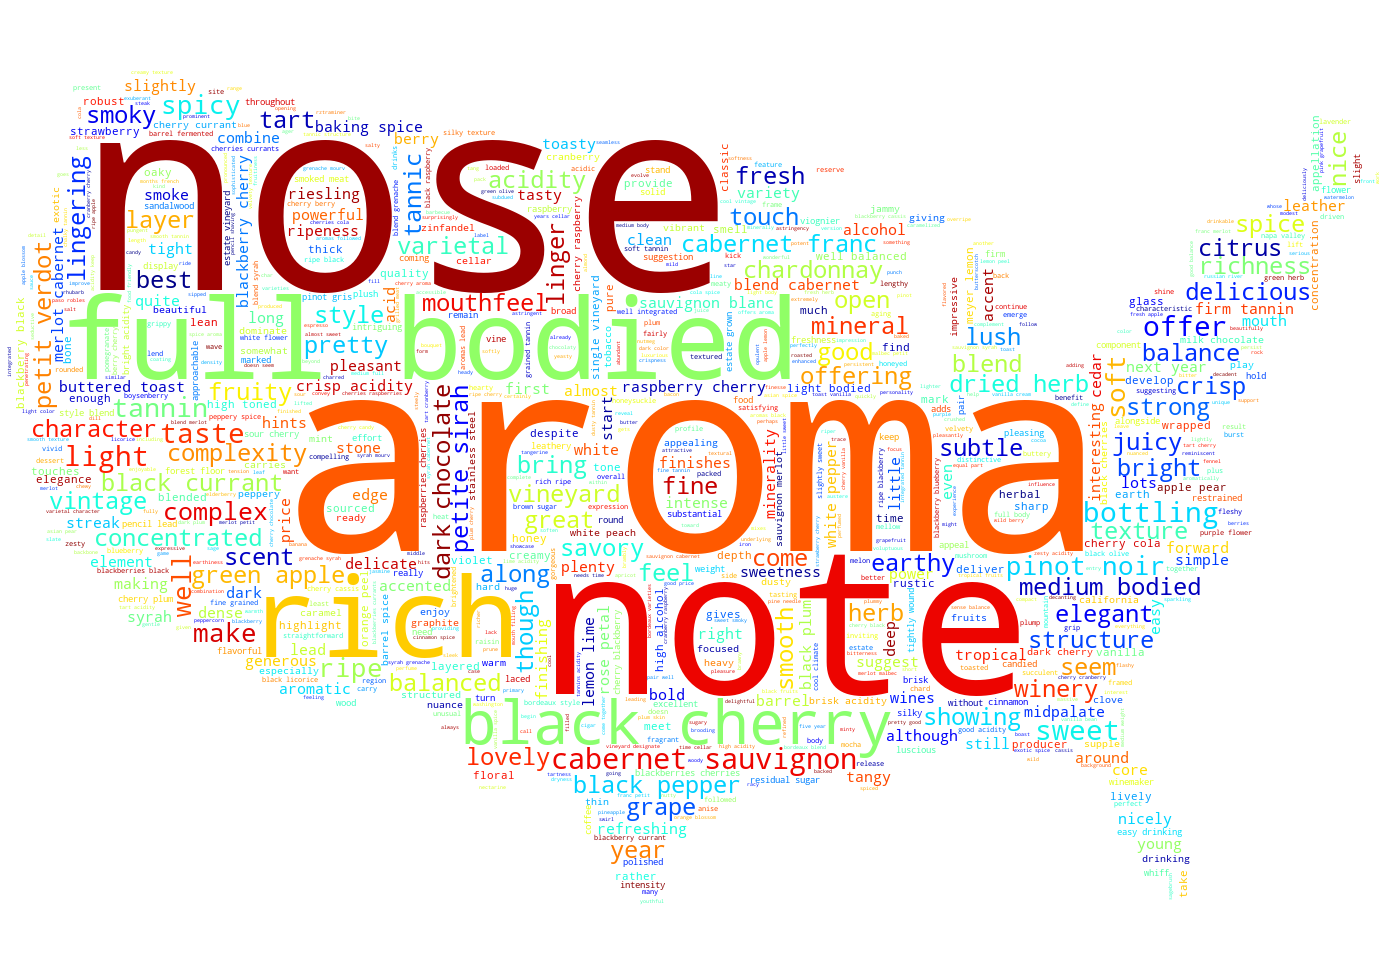

In [121]:
words = descriptions['US']
us_wc = generate_country_wordcloud(words, masks['US'], 'US.jpg')
us_wc.to_image()

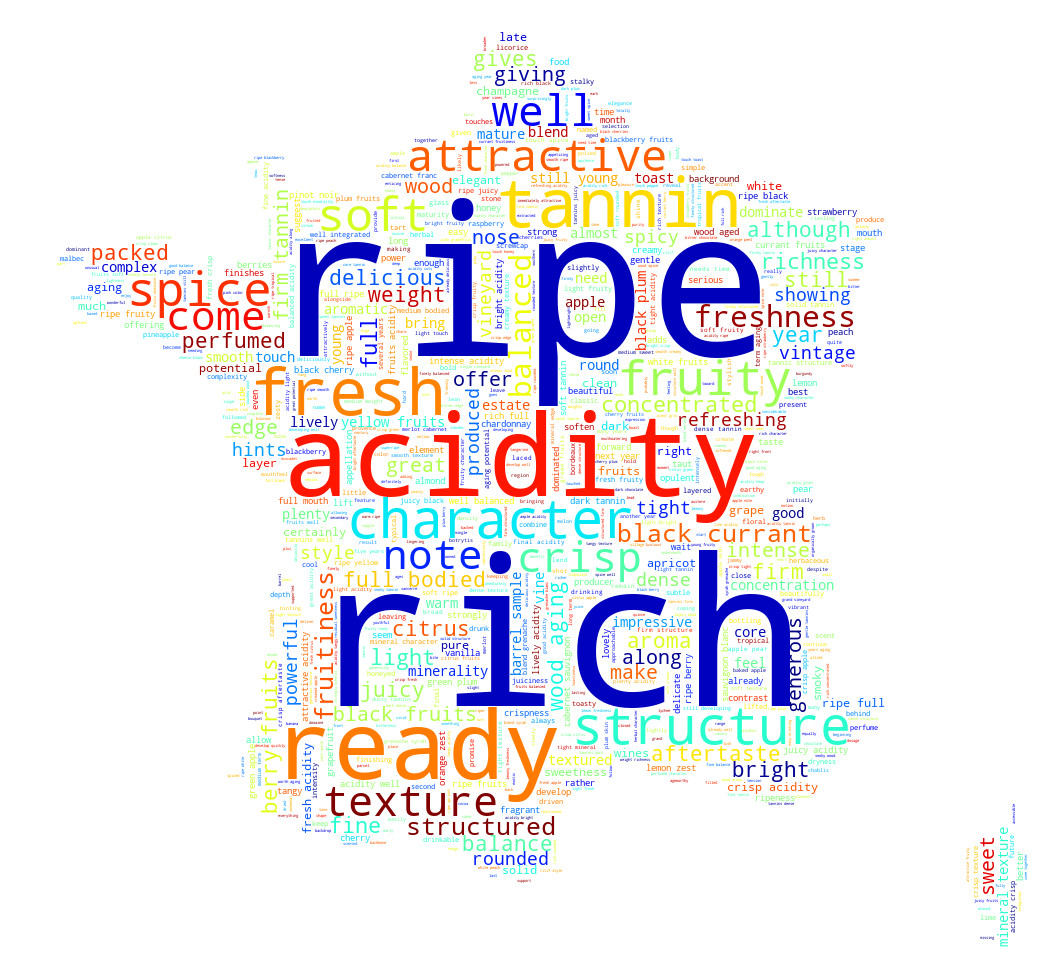

In [124]:
words = descriptions['France']
france_wc = generate_country_wordcloud(words, masks['France'], 'France.jpg')
france_wc.to_image()

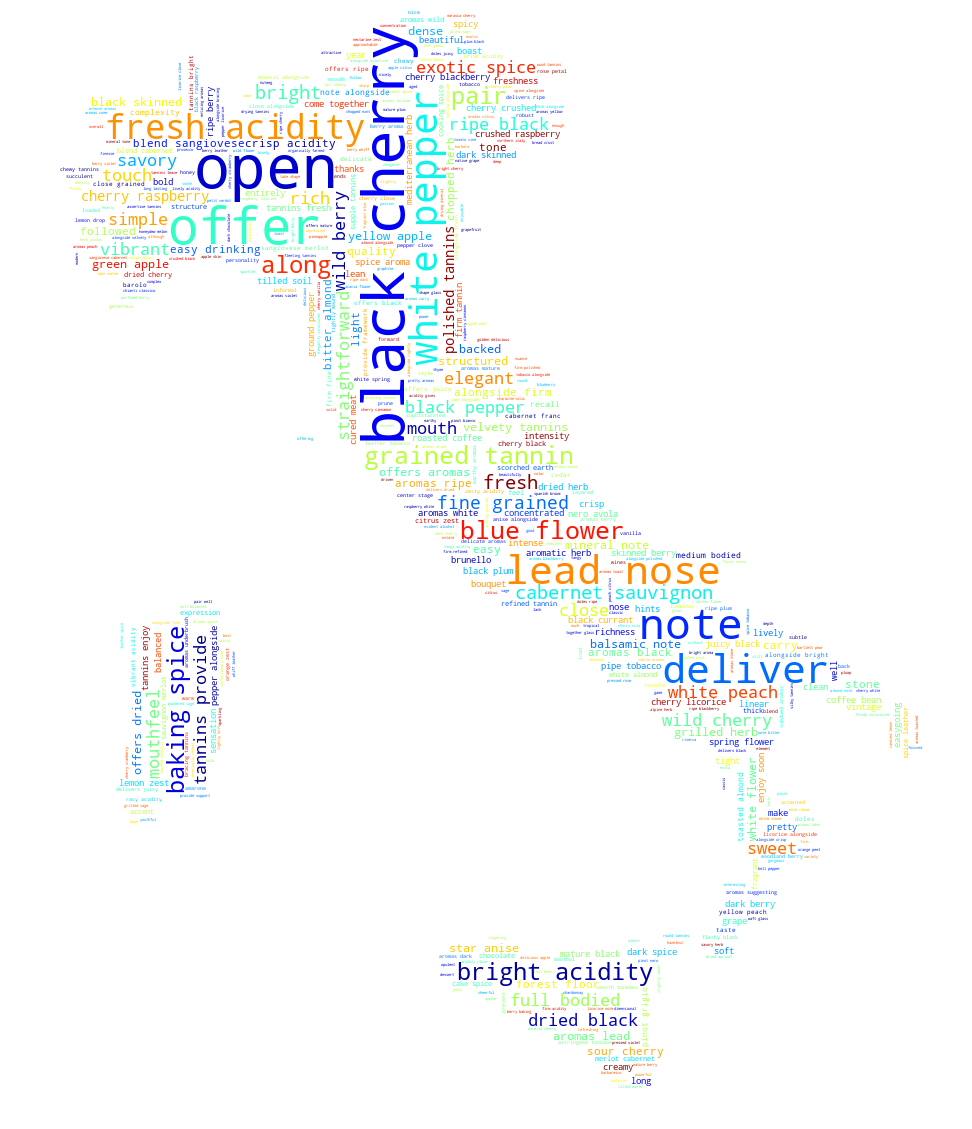

In [125]:
words = descriptions['Italy']
italy_wc = generate_country_wordcloud(words, masks['Italy'], 'Italy.jpg')
italy_wc.to_image()

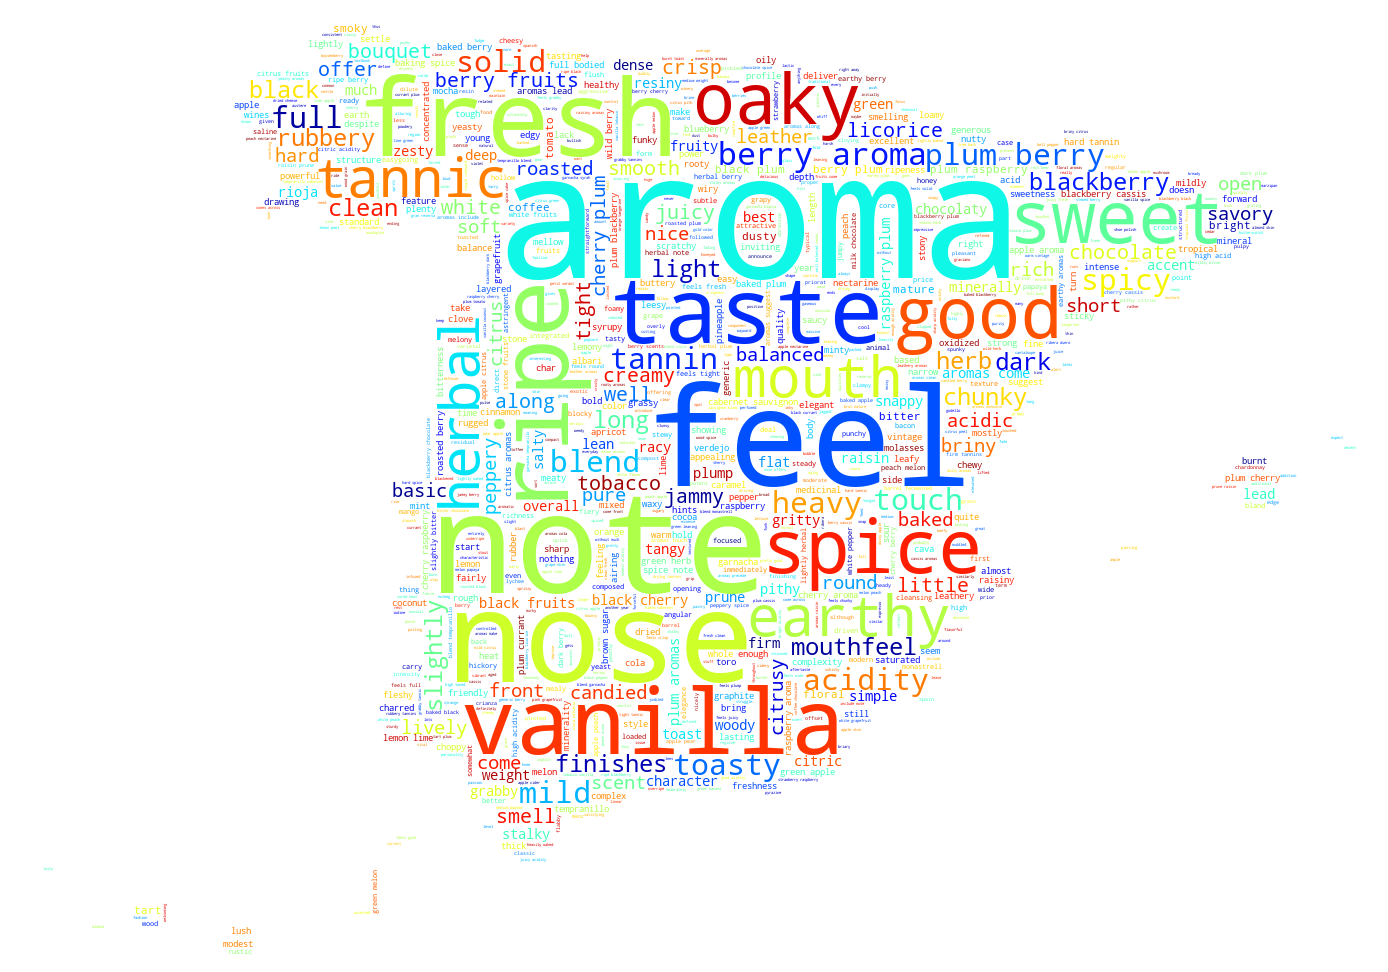

In [129]:
words = descriptions['Spain']
spain_wc = generate_country_wordcloud(words, masks['Spain'], 'Spain.jpg')
spain_wc.to_image()

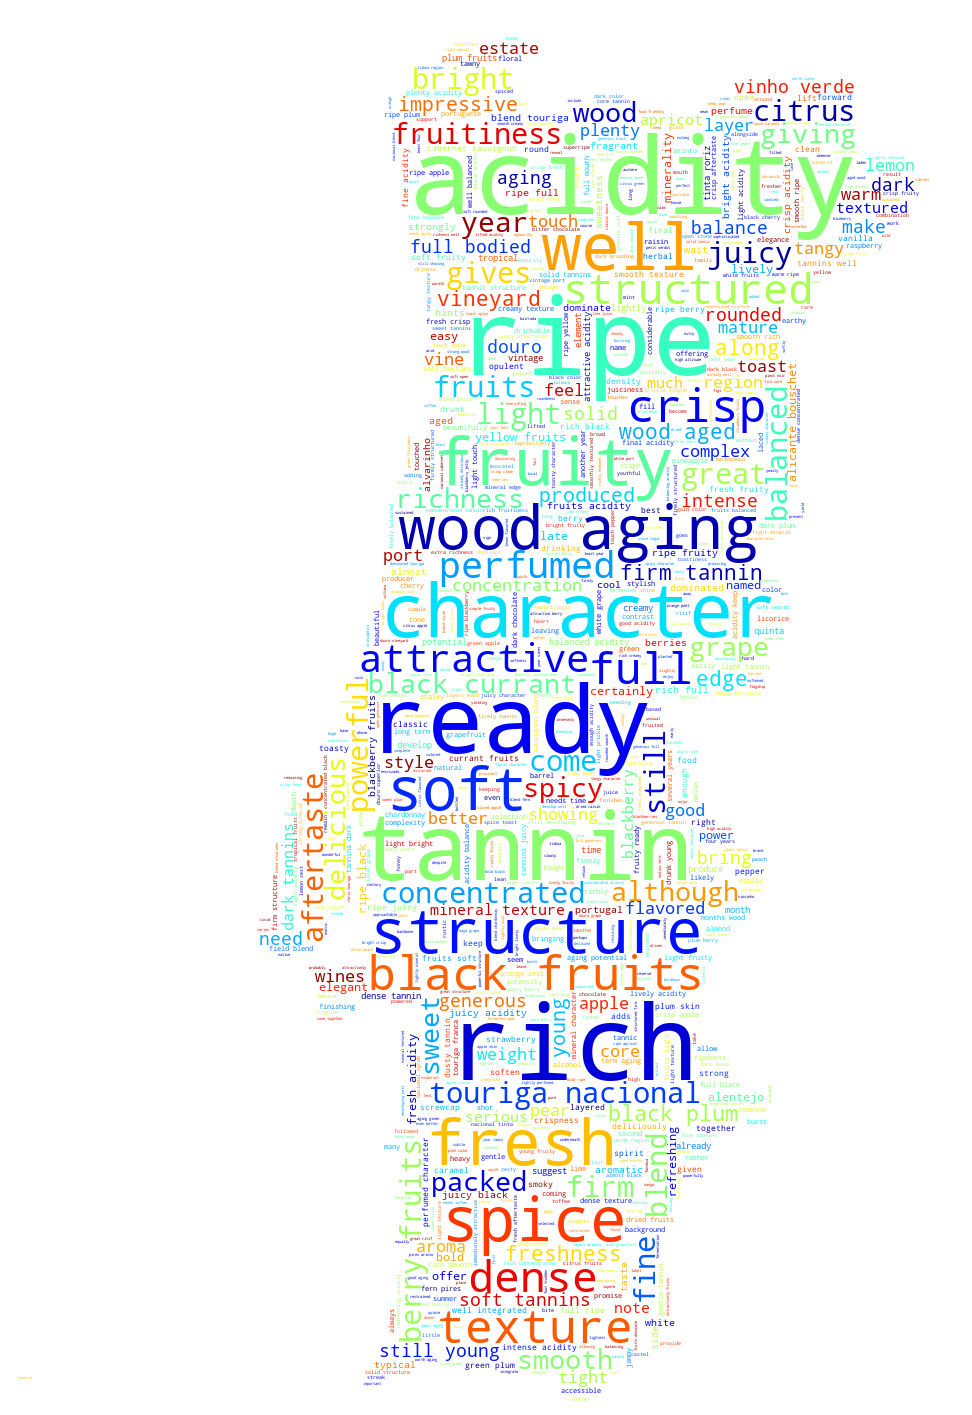

In [130]:
words = descriptions['Portugal']
portugal_wc = generate_country_wordcloud(words, masks['Portugal'], 'Portugal.jpg')
portugal_wc.to_image()

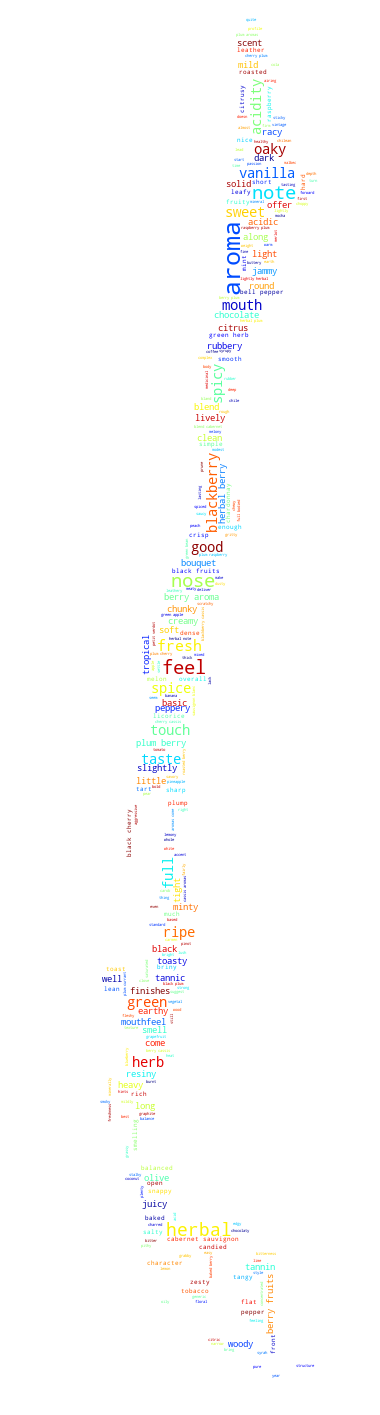

In [133]:
words = descriptions['Chile']
chile_wc = generate_country_wordcloud(words, masks['Chile'], 'chile.jpg')
chile_wc.to_image()

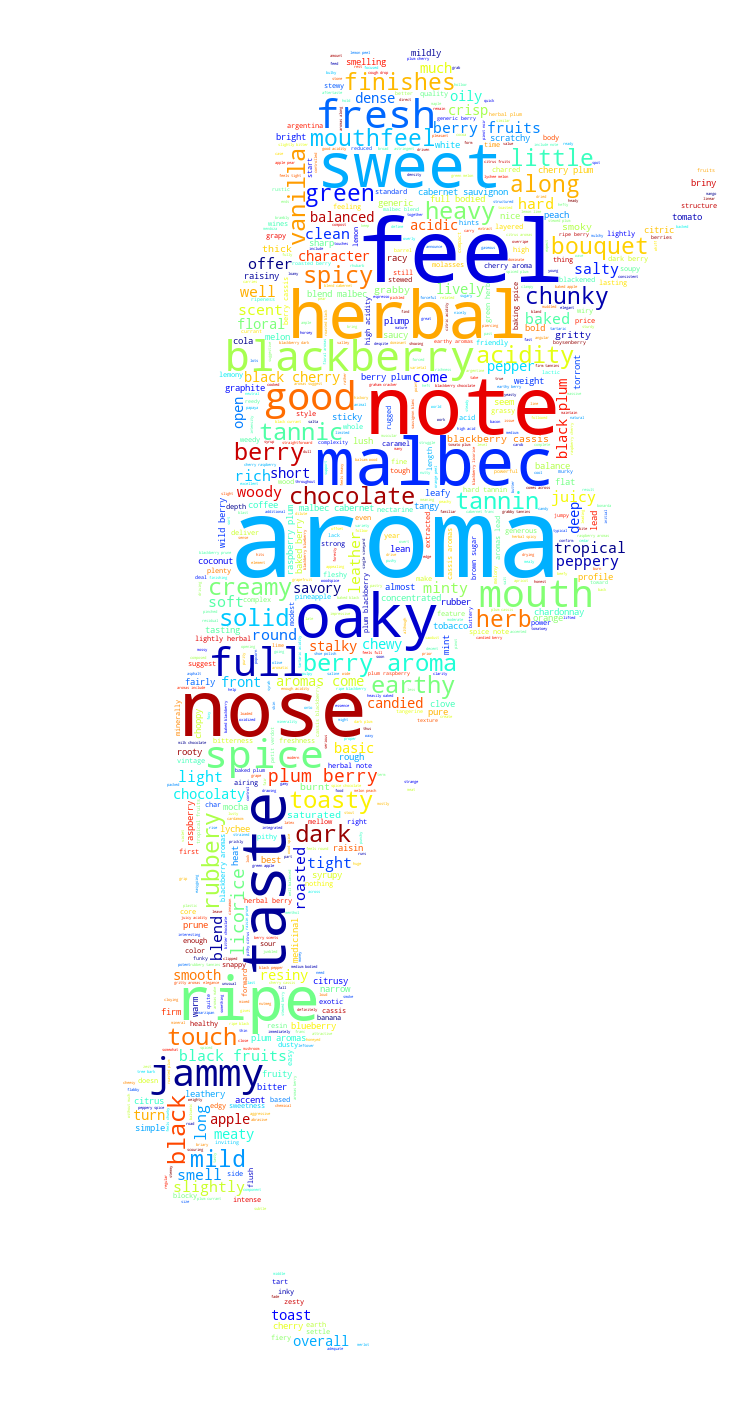

In [134]:
words = descriptions['Argentina']
argentina_wc = generate_country_wordcloud(words, masks['Argentina'], 'argentina.jpg')
argentina_wc.to_image()

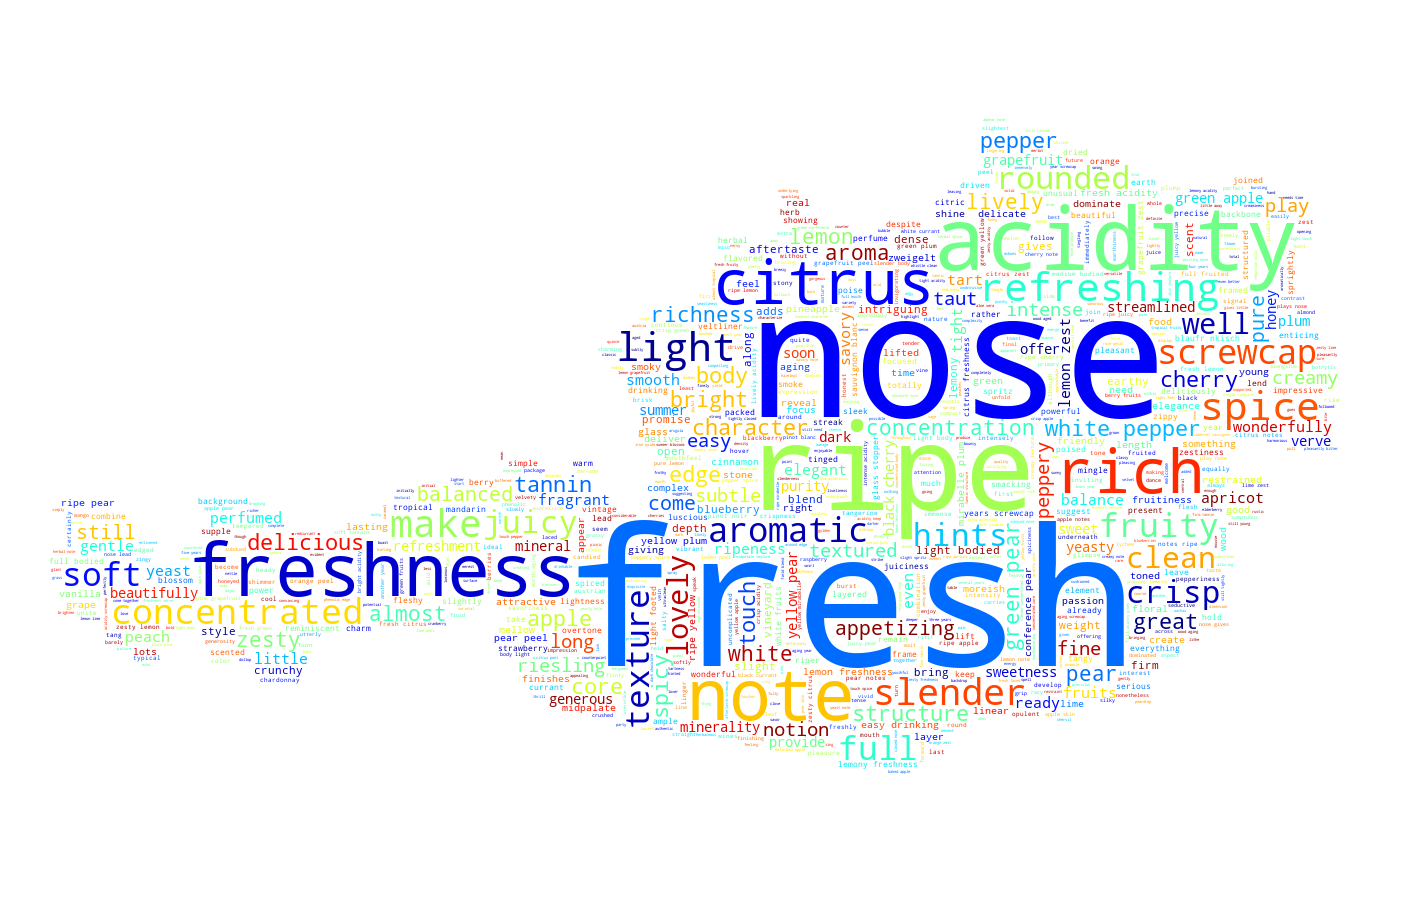

In [135]:
words = descriptions['Austria']
austria_wc = generate_country_wordcloud(words, masks['Austria'], 'austria.jpg')
austria_wc.to_image()

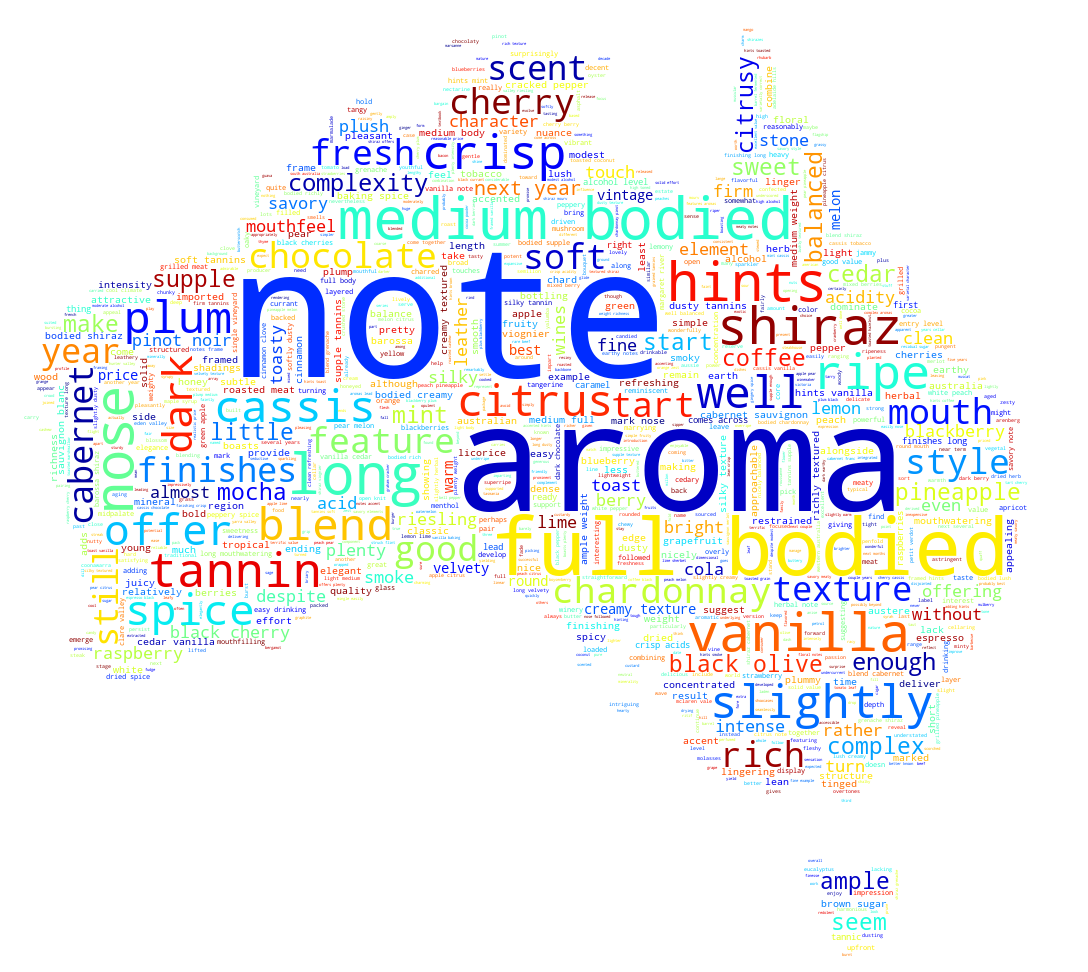

In [136]:
words = descriptions['Australia']
australia_wc = generate_country_wordcloud(words, masks['Australia'], 'australia.jpg')
australia_wc.to_image()

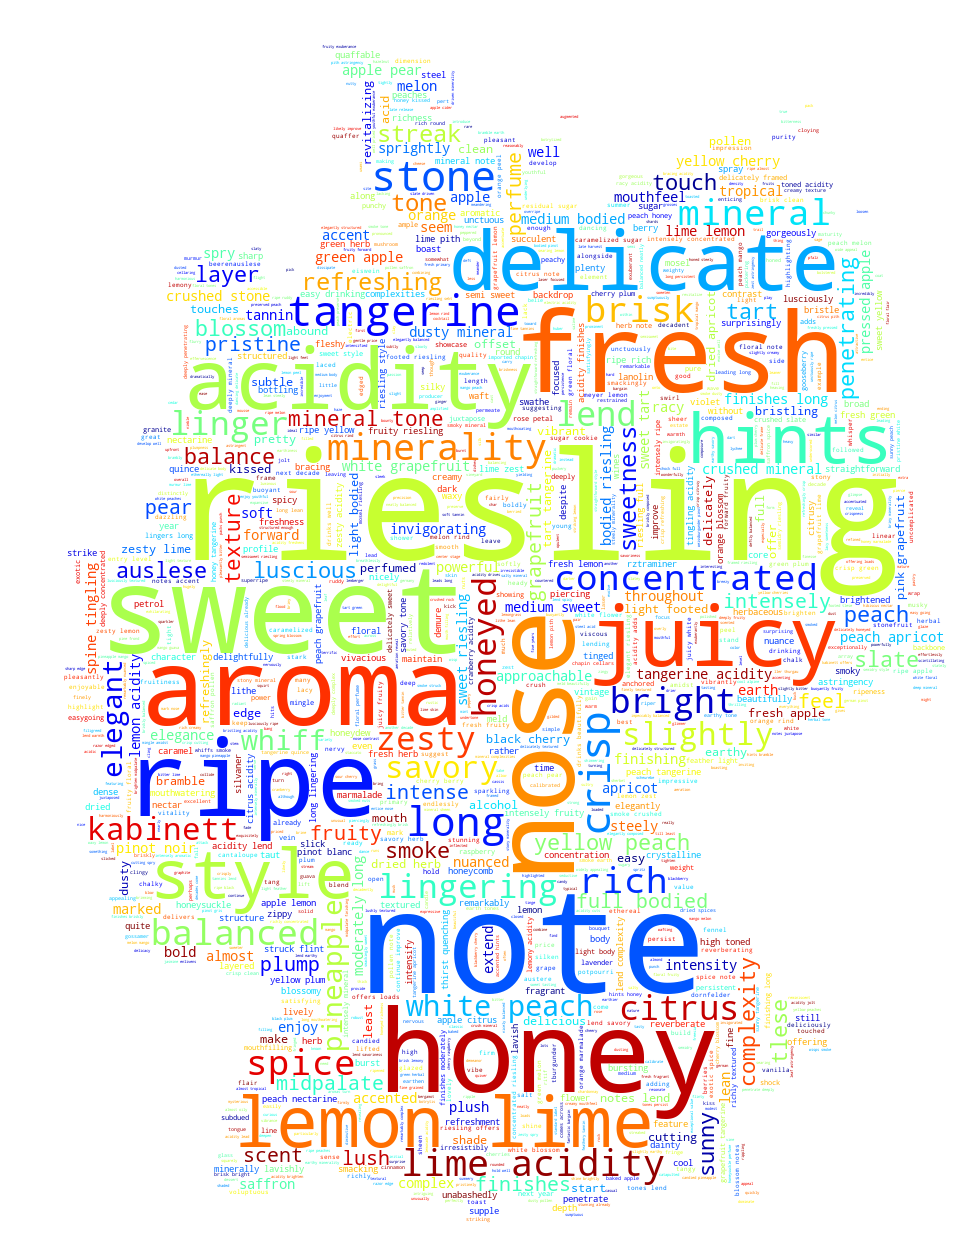

In [137]:
words = descriptions['Germany']
germany_wc = generate_country_wordcloud(words, masks['Germany'], 'germany.jpg')
germany_wc.to_image()

### Dispersion Plot for Fruits

1. Can look at individual ones for top 10 countries if required

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good c

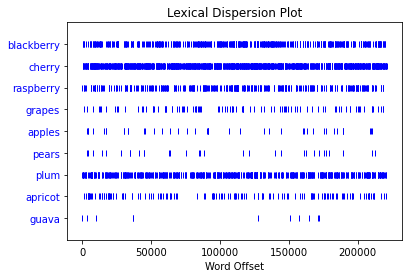

In [143]:
#converting series object into a single string object
text = df['description'][:5000].astype(str) #select how many rows do we want to take into account for dispersion plot
sentence=""

for word in text:
    sentence += word
    
print (sentence)
tokens = nltk.word_tokenize(sentence)   # tokenize it
mytext = nltk.Text(tokens)
mytext.dispersion_plot(["blackberry", "cherry", "raspberry", "grapes", "apples", "pears", "plum", "apricot", "guava"])

### Dispersion Plot for Flavors 

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good c

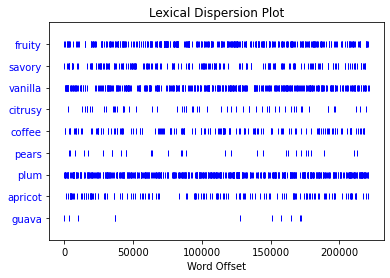

In [144]:
#converting series object into a single string object
text = df['description'][:5000].astype(str) #select how many rows do we want to take into account for dispersion plot
sentence=""

for word in text:
    sentence += word
    
print (sentence)
tokens = nltk.word_tokenize(sentence)   # tokenize it
mytext = nltk.Text(tokens)
mytext.dispersion_plot(["fruity", "savory", "vanilla", "citrusy", "coffee", "pears", "plum", "apricot", "guava"])

### Reference Code

In [ ]:

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords_updated,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

In [ ]:
# Fixing random state for reproducibility
#np.random.seed(19680801)

reviews = num_of_reviews.head(12)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
country = ('US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentine', 'Austria', 'Australia', 'Germany', 'New Zealand', 'South Africa')
y_pos = np.arange(len(country))
number = 3 + 10 * np.random.rand(len(people))


ax.barh(y_pos, number, align='center')
ax.set_yticks(y_pos, labels=country)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Reviews')
ax.set_title('Descending Order for Countries with >1000 Reviews')

plt.show()


Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401